## GAT

In [1]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd
import cudf

data = pd.read_csv(r"extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)

/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs
$$$$$$$$$$$$$$$$$$$$
Testing: 


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 180157 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs


In [2]:
data = pd.concat((data_analysis.get_training_data(), data_analysis.get_testing_data()))
data = cudf.from_pandas(data)

In [3]:
data = data.sort_values("Id")

In [4]:
unique_ids = data["Id"].unique()

In [5]:
data = data.reset_index(drop=True)

In [6]:
data.pop("index")

0           665587
1           665588
2           665589
3           665590
4           665591
            ...   
1381353    2709535
1381354    2709537
1381355    2709538
1381356    2709541
1381357    2709540
Name: index, Length: 1381358, dtype: int64

In [7]:
data

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
0,1,79,M,Control,Leipzig,Training,ED,1,420.0,<NA>,<NA>,0.75,8.1,86.0,<NA>,167.0,4.36,7.3,Control
1,2,35,M,Control,Leipzig,Training,GEN,1,0.0,<NA>,<NA>,<NA>,10.6,79.9,<NA>,199.0,6.02,4.7,Control
2,3,47,W,Control,Leipzig,Training,AMB,1,0.0,<NA>,<NA>,3.87,8.7,89.9,<NA>,298.0,4.37,7.1,Control
3,4,28,M,Control,Leipzig,Training,ED,1,780.0,<NA>,<NA>,0.52,9.9,96.2,<NA>,216.0,4.79,5.3,Control
4,5,63,W,Control,Leipzig,Training,GEN,1,0.0,<NA>,<NA>,232.87,7.4,86.6,<NA>,189.0,3.96,20.9,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381353,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,0.0,MICU,902760.0,27.81,7.1,98.2,<NA>,158.0,3.28,9.4,Control
1381354,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,354780.0,MICU,547980.0,20.14,6.8,97.5,<NA>,134.0,3.18,7.0,Control
1381355,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,606720.0,MICU,296040.0,17.88,6.7,96.6,<NA>,121.0,3.20,7.2,Control
1381356,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,895680.0,MICU,7080.0,22.98,7.7,91.8,<NA>,155.0,3.67,7.1,Sepsis


In [8]:
import cudf
cudf.read_csv("pos_encodings_new.csv", header = None)

,0,1,2,3,4,5,6
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.0
1,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
2,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
3,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
4,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...
1381354,0.909297,-0.416147,0.143441,0.989659,0.010359,0.999946,0.0
1381355,-0.756802,-0.653644,0.283915,0.958850,0.020716,0.999785,0.0
1381356,0.841471,0.540302,0.071906,0.997411,0.005179,0.999987,0.0
1381357,-0.279415,0.960170,0.418517,0.908209,0.031072,0.999517,0.0


In [22]:
import numpy as np
i = 0

sepsis_positions = []
for Id, group in data.groupby("Id"):
    indices = group.index
    sorted_group = group.reset_index().sort_values("Time").to_pandas()
    sepsis_indices = sorted_group.index[sorted_group["Label"] == "Sepsis"].tolist()
    max_indices = sorted_group.shape[0]
    if (sorted_group["Label"] == "Sepsis").sum() > 0:
        print((sepsis_indices, max_indices))
        sepsis_positions.append((sepsis_indices, max_indices))
    i+=1
    if i % 1000 == 0:
        print(f"{str(i / unique_ids.shape[0] * 100)} %")


([0], 1)
0.1411243375976404 %
([1], 3)
([0], 1)
0.2822486751952808 %
([0], 1)
([0], 1)
0.4233730127929212 %
([0], 1)
0.5644973503905616 %
0.705621687988202 %
([1], 2)
([0], 2)
([0], 1)
0.8467460255858424 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([0], 3)
0.9878703631834829 %
([0], 4)
([0], 1)
([0], 1)
1.1289947007811232 %
([0], 1)
1.2701190383787637 %
([0, 1], 2)
([0], 1)
1.411243375976404 %
([0], 1)
([0], 1)
([0], 1)
1.5523677135740444 %
([1], 4)
([0], 1)
1.6934920511716849 %
([1], 6)
([1], 6)
1.8346163887693252 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([2], 12)
1.9757407263669657 %
([0], 1)
([0], 1)
2.116865063964606 %
2.2579894015622464 %
([0], 1)
([1], 4)
([0], 1)
2.399113739159887 %
([3, 0], 4)
([0], 1)
([2], 10)
([0], 1)
([0], 1)
2.5402380767575274 %
([0], 1)
([0], 1)
([0], 1)
([1], 6)
([11], 13)
([0], 1)
2.6813624143551675 %
([0], 1)
([1], 3)
([0], 1)
2.822486751952808 %
([0], 1)
([1, 4], 5)
2.963611089550448 %
([0], 1)
([0], 1)
3.1047354271480887 %
([0], 1)
([0], 1)
([0], 1)


([0], 1)
([44], 45)
25.402380767575274 %
([0], 1)
([0], 1)
([0], 1)
25.543505105172915 %
([0], 1)
([0], 1)
([2], 7)
([0], 1)
25.68462944277055 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
25.825753780368192 %
25.966878117965837 %
([0], 1)
([0], 1)
([0], 1)
26.108002455563472 %
([0], 1)
26.249126793161114 %
([0], 1)
([0], 1)
([0], 1)
26.390251130758756 %
([0], 1)
([0], 5)
([0], 1)
([0], 1)
26.531375468356394 %
([0], 3)
([0], 1)
([5], 6)
([0], 1)
([0], 1)
([0], 2)
26.672499805954036 %
([0], 4)
([0], 1)
([0], 1)
([0], 1)
26.813624143551678 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
26.954748481149316 %
([0], 1)
([0], 1)
([2], 3)
([0], 1)
([0], 1)
([0], 1)
27.095872818746958 %
([0], 1)
([22], 24)
([0], 1)
([0], 1)
27.2369971563446 %
([0], 1)
([0], 1)
([0], 1)
27.37812149394224 %
([0], 1)
([0], 1)
([0], 1)
([2], 6)
27.51924583153988 %
([2], 3)
([0], 1)
27.660370169137515 %
([0], 1)
([0], 1)
([0], 1)
27.801494506735157 %
([11], 13)
([0], 1)
([0], 1)
27.9426188443328 %
([0], 1)
([0], 1)
([0], 1)
28.08374

([0], 1)
50.522512859955256 %
([0], 1)
([1], 6)
([1], 10)
([1], 2)
([10], 32)
([27], 59)
50.6636371975529 %
([0], 2)
50.80476153515055 %
([2], 3)
([19], 24)
([0], 1)
([0], 1)
([1], 5)
([70], 80)
50.945885872748185 %
([0], 1)
([1], 6)
([1], 2)
51.08701021034583 %
([0], 2)
([0], 1)
([0], 1)
([0], 1)
([0], 1)
51.22813454794346 %
([0], 1)
([0], 1)
51.3692588855411 %
([1], 2)
([5], 22)
([0], 1)
51.510383223138746 %
([7], 29)
([0], 1)
([0], 1)
51.651507560736384 %
([0], 1)
([0], 2)
([2], 4)
([2], 4)
([0], 1)
51.79263189833403 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
51.933756235931675 %
([0], 2)
([0], 1)
([0], 1)
([0], 1)
52.074880573529306 %
([0], 1)
([0], 1)
([14], 50)
52.216004911126944 %
([1], 5)
([0], 1)
([0], 1)
52.35712924872459 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([0], 1)
52.49825358632223 %
([4], 7)
([7], 22)
52.639377923919874 %
([0], 1)
52.78050226151751 %
([1], 6)
([0], 1)
([3], 8)
([0], 1)
52.92162659911514 %
([0], 1)
([0], 1)
([0], 1)
53.06275093671279 %
([0], 1)
([0], 1)
([1, 4

([0], 1)
([0], 1)
74.93702326434706 %
([5], 6)
75.07814760194469 %
([4], 5)
([0], 1)
([0], 1)
75.21927193954234 %
([0], 1)
([0], 4)
75.36039627713997 %
([0], 1)
([0], 1)
([6], 7)
([0], 1)
([4], 8)
([1], 4)
75.50152061473761 %
([0], 1)
([0], 1)
([0], 1)
75.64264495233526 %
([0], 1)
([0], 1)
75.7837692899329 %
([0], 1)
([0], 3)
75.92489362753054 %
([0], 1)
76.06601796512817 %
([1], 2)
([0], 1)
76.20714230272581 %
([0], 1)
([0], 1)
([5], 9)
76.34826664032346 %
([0], 1)
([0], 1)
([0], 1)
76.4893909779211 %
([0], 1)
([0], 1)
([0], 2)
76.63051531551874 %
([1], 2)
([0], 2)
76.77163965311638 %
([2], 5)
([0], 1)
([4], 9)
76.91276399071401 %
([0], 1)
([0, 2], 3)
([0], 1)
77.05388832831166 %
([0], 1)
([0], 1)
77.1950126659093 %
([0, 1], 2)
([0], 1)
([7], 10)
([0], 1)
([0], 1)
77.33613700350695 %
([0, 2], 3)
([0], 1)
77.47726134110458 %
([0], 1)
([0], 1)
([1], 2)
77.61838567870221 %
([0], 1)
77.75951001629986 %
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([0], 1)
([0], 1)
77.9006343538975 %
([0], 1)
([0],

In [46]:
indices_list = list(map(lambda x: x[0], sepsis_positions))

only_one_sample = 0
indices_over_length = []
for indices, length in sepsis_positions:
    if length == 1:
        only_one_sample += 1
    if length > 1:
        for index in indices:
            indices_over_length.append((index+1)/length)
print(only_one_sample)
print(pd.DataFrame(indices_over_length).describe())
sepsis_sum = 0
for index_list in indices_list:
    sepsis_sum+= len(index_list)
pd.DataFrame(indices_over_length).describe()

1385
                0
count  631.000000
mean     0.598936
std      0.286073
min      0.027397
25%      0.336158
50%      0.571429
75%      0.857143
max      1.000000


,0
count,631.000000
mean,0.598936
std,0.286073
min,0.027397
25%,0.336158
50%,0.571429
75%,0.857143
max,1.000000


In [ ]:
import numpy as np
import cupy as cp
import time

source_edge_index = cp.array([], dtype= cp.int32)
target_edge_index = cp.array([], dtype= cp.int32)

start = time.time()
i = 0
for Id, group in data.groupby("Id"):
    indices = group.index
    indices = cp.expand_dims(indices.values, axis = 1)
    target = cp.repeat(indices, indices.shape[0], axis = 1)
    source = target.transpose().flatten()
    target = target.flatten()

    source_edge_index = cp.concatenate((source_edge_index, source))
    target_edge_index = cp.concatenate((target_edge_index, target))
    i+=1
    if i % 1000 == 0:
        print(f"{str(i / unique_ids.shape[0] * 100)} %")

print(time.time() - start )
print(source_edge_index.shape)
print(target_edge_index.shape)


In [10]:
# import torch
# edge_index = np.asarray([np.asarray(source_edge_index.get()), np.asarray(target_edge_index.get())])
# edge_index = torch.tensor(edge_index)

In [11]:
#pd.DataFrame(edge_index.numpy().transpose()).to_csv("edge_index_sorted_ids.csv", index=False)
import torch
edge_index = torch.tensor(pd.read_csv("edge_index_sorted_ids.csv", header=None, skiprows=1).values.transpose(), dtype=torch.long)

In [12]:
from dataAnalysis.Constants import SEX_CATEGORY_COLUMN_NAME, SEX_COLUMN_NAME, FEATURES
data[SEX_CATEGORY_COLUMN_NAME] = data.loc[:, SEX_COLUMN_NAME] =="W"

In [13]:
data[SEX_CATEGORY_COLUMN_NAME] = data[SEX_CATEGORY_COLUMN_NAME].astype("int8")
data["Label"] = data["Label"] == "Sepsis"
data["Label"] = data["Label"].astype("int8")

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d = len(FEATURES), n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [15]:
X_features = torch.tensor(data[FEATURES].values.get()).type(torch.float32)
y = torch.tensor(data["Label"].values.get()).type(torch.long)

In [16]:
from dataAnalysis.FeatureImportance import normalize

X_features = normalize(X_features)

In [17]:
# import numpy as np
# import time

# pos_encodings = None

# start = time.time()
# i = 0
# final_shape = 0
# for Id, group in data.groupby("Id"):
#     encoding = getPositionEncoding(group.shape[0])
#     sorted_group = group.reset_index().sort_values("Time")
#     encoding = encoding[sorted_group.index.to_numpy()]
#     final_shape += group.shape[0]
#     pos_encodings = encoding if pos_encodings is None else np.concatenate((pos_encodings, encoding), axis=0)
#     i+=1
#     if i % 1000 == 0:
#         print(f"{str(i / unique_ids.shape[0] * 100)} %")

# print(pos_encodings.shape[0] == final_shape)

In [18]:
#pd.DataFrame(pos_encodings).to_csv("pos_encodings_new.csv", index=False)

In [19]:
pos_encodings = pd.read_csv("pos_encodings_new.csv", header=None, skiprows=1)

In [20]:
pos_encodings = pos_encodings.values

In [21]:
X_features

tensor([[ 1.1980, -1.0057,  0.3778,  ...,  0.3372, -0.3396, -0.6593],
        [-1.2056, -1.0057,  2.0438,  ...,  2.3610, -1.3328, -0.3798],
        [-0.5501,  0.9944,  0.7776,  ...,  0.3494,  0.2954,  0.4852],
        ...,
        [-0.0584, -1.0057,  0.1112,  ..., -0.5040,  0.6047, -0.7642],
        [-0.0584, -1.0057, -0.5552,  ..., -1.1868,  1.9399, -0.9913],
        [-0.0584, -1.0057, -0.5552,  ..., -1.0770,  1.3863, -1.0612]])

In [22]:
X_new_features = X_features + pos_encodings

In [23]:
X_new_features

tensor([[ 1.1980, -0.0057,  0.3778,  ...,  0.3372,  0.6604, -0.6593],
        [-1.2056, -0.0057,  2.0438,  ...,  2.3610, -0.3328, -0.3798],
        [-0.5501,  1.9944,  0.7776,  ...,  0.3494,  1.2954,  0.4852],
        ...,
        [ 0.7830, -0.4653,  0.1831,  ..., -0.4989,  1.6047, -0.7642],
        [-0.3378, -0.0455, -0.1367,  ..., -1.1557,  2.9394, -0.9913],
        [-0.0584, -0.0057, -0.5552,  ..., -1.0770,  2.3863, -1.0612]],
       dtype=torch.float64)

In [24]:
def ratio_bool_switch(tensor, ratio = 0.8):
    random = np.random.uniform(0, 1 ,tensor.shape[0])
    val_ratio_mask = (random >= 0.8)
    train_ratio_mask = (random < 0.8)
    val_mask = np.logical_and(tensor.tolist(), val_ratio_mask.tolist())
    train_mask = np.logical_and(tensor.tolist(), train_ratio_mask.tolist())
    return torch.from_numpy(train_mask).type(torch.bool), torch.from_numpy(val_mask).type(torch.bool)

In [25]:
from torch_geometric.data import Data

train_mask_ser = data["Set"] != "Validation"
train_mask, val_mask = ratio_bool_switch(train_mask_ser.values)
test_mask = torch.from_numpy((data["Set"] == "Validation").values.get()).type(torch.bool)
graph = Data(x=X_new_features, train_mask = train_mask, test_mask=test_mask, val_mask=val_mask, y= y, edge_index=edge_index)

In [26]:
graph

Data(x=[1381358, 7], edge_index=[2, 9591746], y=[1381358], train_mask=[1381358], test_mask=[1381358], val_mask=[1381358])

In [27]:
graph = graph.cpu()

In [28]:
from torch_geometric.loader import NeighborLoader

kwargs = {
    "num_neighbors":[-1] * 2,
    "batch_size":50_000
}
loader = NeighborLoader(
    graph,
    input_nodes=graph.train_mask,
    **kwargs
)
val_loader = NeighborLoader(
    graph,
    input_nodes=graph.val_mask,
    **kwargs
)

In [29]:
device = torch.device("cuda:2") if torch.cuda.is_available() else torch.device("cpu")

# graph = graph.to(device)
WEIGHT = torch.tensor([664*3/4])#
WEIGHT = WEIGHT.to(device)

print("Data shifted to the device " + str(device))

Data shifted to the device cuda:2


In [30]:
import torch.nn.functional as F
from torch_geometric.nn import GATConv, GCNConv,GATv2Conv, GINConv, global_add_pool
from torch.nn import Linear
import torch
from dataAnalysis.Constants import FEATURES
from torch.nn import Linear, ReLU, Sequential
from torch.nn import BatchNorm1d as BatchNorm

class GraphNeuralNetwork(torch.nn.Module):
    def __init__(self, hidden_dim = 128, out_channels = 1):
        super(GraphNeuralNetwork, self).__init__()
        input_dim = len(FEATURES)      
        
        HEADS = 5
        
        conv_1= GATConv(input_dim, hidden_dim,heads=HEADS, add_self_loops = False)
        conv_end = GATConv((-1,-1), out_channels,add_self_loops = False)
        
        self.conv_1 = conv_1
        self.conv_end = conv_end
        

    def forward(self, graph):
        x, edge_index = graph.x, graph.edge_index
        x = x.type(torch.float)
        x = self.conv_1(x, edge_index)
        x = F.normalize(x, p=2., dim=-1)
        x = torch.relu(x)
        x = self.conv_end(x, edge_index)
        return x
            
    def predict_proba(self, graph, mask):
        with torch.inference_mode():
            self.eval()
            logits = self.forward(graph)
            scores = torch.sigmoid(torch.squeeze(logits[mask]))
            scores = torch.unsqueeze(scores, 0)
            proba_predict = torch.concat((1- scores, scores), dim = 0)
            return torch.transpose(proba_predict, 0, 1)
            
    def predict(self, graph, mask):
        return torch.round(self.predict_proba(graph, mask)[:, 1])

In [31]:
import torch 
from tqdm.notebook import tqdm
class ModelWrapper():
    def __init__(self, graph):
        self.LEARNING_RATE = 3e-4
        self.MAX_EPOCHS = 5000 #40000

        self.model = GraphNeuralNetwork(hidden_dim = 128, out_channels=1) 
        self.model = self.model.to(device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.LEARNING_RATE,betas=(0.9, 0.999), eps=1e-08)
        self.graph = graph
        
        self.last_loss = 0
        self.increased_loss = 0
        self.BREAKING_THRESHOLD = 3   
        self.val_loss = []
        self.train_loss = []
        self.epochs = self.MAX_EPOCHS
    
    def validate(self):
        with torch.inference_mode():
            self.model.eval()
            acc_loss = 0
            batch_size = 0
            for batch, graph in enumerate(val_loader):
                graph = graph.to(device)
                out = self.model(graph)
                loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), graph.y.type(torch.float32),
                                                          pos_weight=WEIGHT)
                acc_loss += loss.item()
                batch_size += 1
            avg_loss = acc_loss / batch_size
            self.val_loss.append(avg_loss)
            if avg_loss > self.last_loss:
                self.increased_loss += 1
            else:
                self.increased_loss = 0
            self.last_loss = avg_loss

    def train(self):
        for epoch in tqdm(range(self.MAX_EPOCHS)):
            acc_loss = 0
            batch_size = 0
            for batch, graph in enumerate(loader):
                graph = graph.to(device)
                self.model.train()
                self.optimizer.zero_grad()
                out = self.model(graph)
                loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), graph.y.type(torch.float32),
                                                          pos_weight=WEIGHT)
                acc_loss += loss.item()
                batch_size += 1
                loss.backward()
                self.optimizer.step()
            self.train_loss.append(acc_loss/batch_size)
            self.validate() 

            if self.increased_loss >= self.BREAKING_THRESHOLD:
                self.epochs = epoch + 1
                print(f"Breaked at {str(epoch)}")
                break
            
    def get_model(self):
        return self.model    
    
    def plot_loss(self):
        plt.plot(range(len(self.train_loss)), self.train_loss, 'g', label='Training loss')
        plt.plot(range(len(self.val_loss)), self.val_loss, 'y', label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [ ]:
model_wrapper = ModelWrapper(graph)
model_wrapper.train()

  0%|          | 0/5000 [00:00<?, ?it/s]

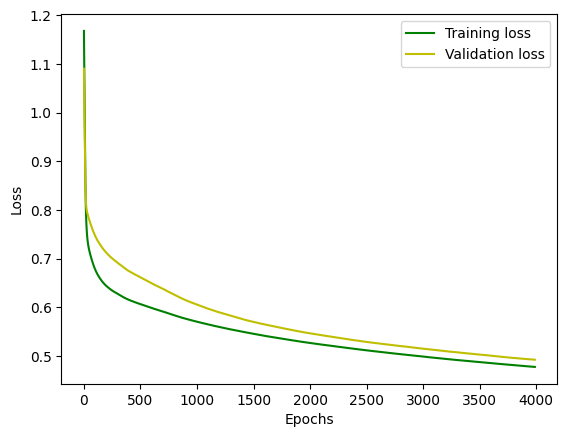

In [46]:
model_wrapper.plot_loss() 

In [47]:
model = model_wrapper.get_model()
graph = graph.cpu()
model = model.cpu()

In [48]:
torch.save(model.state_dict(), "gat_state_dict_10heads.pt")

In [49]:
from dataAnalysis.Metrics import Evaluation
y_dict = Evaluation.create_y_dict(model.predict(graph, test_mask), model.predict_proba(graph, test_mask) , graph.y[test_mask])
y_dict_val = Evaluation.create_y_dict(model.predict(graph, val_mask), model.predict_proba(graph, val_mask) , graph.y[val_mask])

,Name,MCC,F1-Micro,F1-Macro,F1-Binary,AUROC,AUPRC
0,Leipzig,0.093773,0.900175,0.486054,0.024713,0.943675,0.065889
1,Greifswald,0.093773,0.900175,0.486054,0.024713,0.943675,0.065889


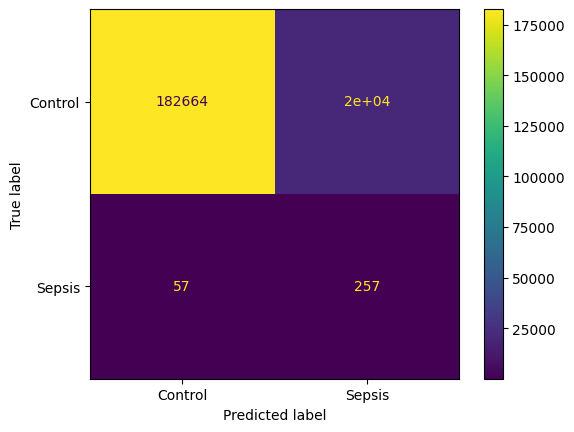

In [50]:
from dataAnalysis.Metrics import Evaluation

Evaluation.plot_confusion_matrix_from_pred(model.predict(graph, val_mask), graph.y[val_mask])
Evaluation.get_df_metrics_from_pred(y_dict_val, y_dict_val)

,Name,MCC,F1-Micro,F1-Macro,F1-Binary,AUROC,AUPRC
0,Leipzig,0.07348,0.884611,0.478003,0.017299,0.909592,0.047194
1,Greifswald,0.07348,0.884611,0.478003,0.017299,0.909592,0.047194


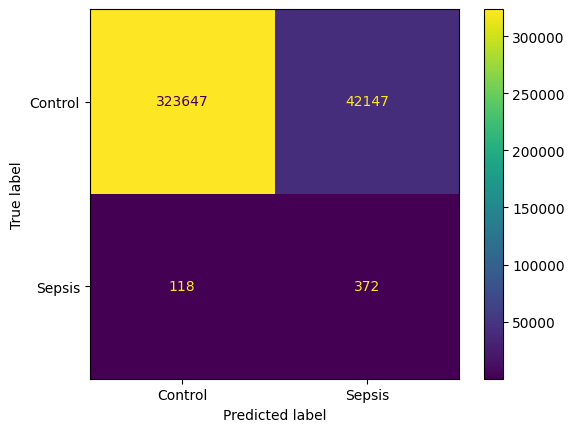

In [51]:
from dataAnalysis.Metrics import Evaluation

Evaluation.plot_confusion_matrix_from_pred(model.predict(graph, test_mask), graph.y[test_mask])
Evaluation.get_df_metrics_from_pred(y_dict, y_dict)

In [ ]:
from IPython.display import Audio
sound_file = './finish_sound.mp3'
Audio(sound_file, autoplay=True)

In [40]:
##TODO:
# - change weight
# - gradients as features
# - different learning rate and number of layers
# - general architecture- less neurons but linear layer before and after convs? 
#       -adding hidden layers with each others for more stable training (guaranteed only when hidden dim is euqal betwene layers)
# - GATv2
# - MIMIC und Greifswald
# - more features

In [41]:
import time

for i in range(10000):
    time.sleep(60)
    print("Sleeping")

Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping
Sleeping


KeyboardInterrupt: 

In [ ]:
##Mindmap
## False positive from random forest to logistic regression
## query2box